In [1]:
import pandas as pd

df = pd.read_csv("../data/OGNT_processed.csv")
df.head()

,Unnamed: 0,book,chapter,verse,word,lemma,trans,author
0,0,mt,1,1,Βιβλος,βίβλος,book,matthew
1,1,mt,1,1,γενεσεως,γένεσις,origin,matthew
2,2,mt,1,1,Ιησου,Ἰησοῦς,Jesus/Joshua,matthew
3,3,mt,1,1,Χριστου,Χριστός,Christ,matthew
4,4,mt,1,1,υιου,υἱός,son,matthew


In [2]:
from distance import compute_author_ngram_frequencies

freqs = compute_author_ngram_frequencies(df, n=3)
dict(sorted(freqs["john"].items(), key=lambda item: item[1], reverse=True))

{'αὐτός ὁ Ἰησοῦς': 0.0018869939829814506,
 'αὐτός καί ὁ': 0.0017089756827001815,
 'ὁ θεός καί': 0.0014597500623064052,
 'καί ἔπω, ἐρῶ, εἶπον αὐτός': 0.0014597500623064052,
 'ὁ γῆ καί': 0.0013529390821376437,
 'ὁ θεός ὁ': 0.0012817317620251363,
 'λέγω αὐτός ὁ': 0.0012461281019688823,
 'ὁ πατήρ ἐγώ': 0.0012461281019688823,
 'ὁ μαθητής αὐτός': 0.0012105244419126286,
 'εἰμί καί ὁ': 0.0011037134617438672,
 'οὗτος εἰμί ὁ': 0.0011037134617438672,
 'ὁ υἱός ὁ': 0.0010325061416313597,
 'ὁ Ἰησοῦς καί': 0.0010325061416313597,
 'ἐκ ὁ οὐρανός': 0.0010325061416313597,
 'εἰς ὁ αἰών': 0.0009256951614625983,
 'ἀμήν ἀμήν λέγω': 0.0008900915014063446,
 'ἀμήν λέγω σύ': 0.0008900915014063446,
 'καί δίδωμι αὐτός': 0.0008900915014063446,
 'ὁ πέμπω ἐγώ': 0.0008544878413500907,
 'ὁ λόγος ὁ': 0.0008544878413500907,
 'αὐτός ἐν ὁ': 0.000818884181293837,
 'ὁ κάθημαι ἐπί': 0.000818884181293837,
 'καί ἐκ ὁ': 0.0007832805212375832,
 'ἐγώ εἰμί ὁ': 0.0007832805212375832,
 'ἐπί ὁ γῆ': 0.0007832805212375832,
 'ἐκ ὁ θεός':

In [3]:
from distance import calculate_distances

distances = calculate_distances(freqs)

print(distances)
unknow_author = {k: v for k, v in distances.items() if "unknown" in k}
print(unknow_author)
unknown_value = min(unknow_author.values())
unknown_value_author = {k: v for k, v in unknow_author.items() if v == unknown_value}
print(F"Unkown autor with min distance: {unknown_value} is {unknown_value_author}")


{('matthew', 'mark'): 503.5780732330827, ('matthew', 'luke'): 642.1033857556612, ('matthew', 'john'): 879.2251254771604, ('matthew', 'paul'): 1182.3190705579132, ('matthew', 'unknown'): 1329.6319145330888, ('matthew', 'james'): 1508.5281419798773, ('matthew', 'peter'): 1510.087350432785, ('matthew', 'jude'): 1589.5855830563166, ('mark', 'luke'): 653.0860610389498, ('mark', 'john'): 835.600986582968, ('mark', 'paul'): 1244.7154776601092, ('mark', 'unknown'): 1339.1732117087479, ('mark', 'james'): 1521.2014195868694, ('mark', 'peter'): 1526.8474249069138, ('mark', 'jude'): 1589.707188380625, ('luke', 'john'): 773.8729935257466, ('luke', 'paul'): 940.2534571857062, ('luke', 'unknown'): 1207.729628340812, ('luke', 'james'): 1476.8005481092603, ('luke', 'peter'): 1476.1264556914407, ('luke', 'jude'): 1582.962105615437, ('john', 'paul'): 1010.1959841210399, ('john', 'unknown'): 1256.9770212973108, ('john', 'james'): 1483.7066313688015, ('john', 'peter'): 1481.016695131568, ('john', 'jude'): 

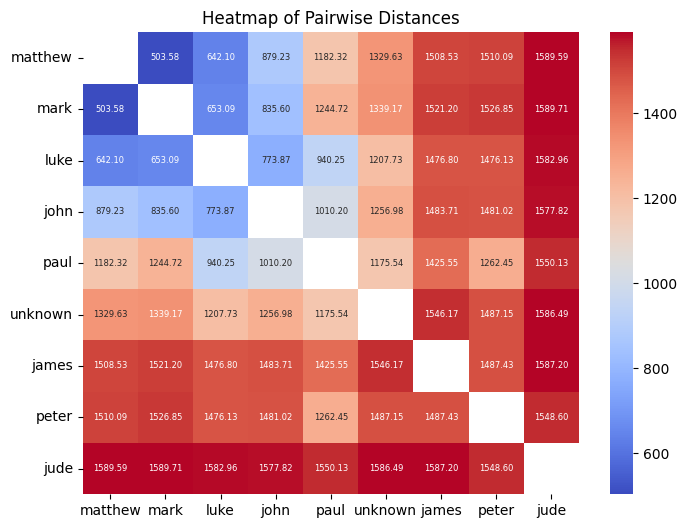

In [4]:
from visualise import show_distance_heatmap

show_distance_heatmap(distances, authors=list(freqs.keys()))

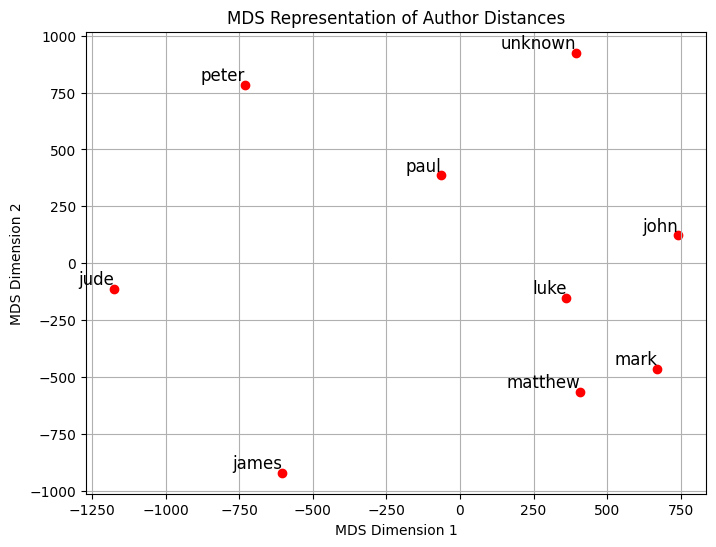

In [5]:
from visualise import show_mds_embedding

show_mds_embedding(distances, authors=list(freqs.keys()))